# Multivariable Linear Regression with Dummy Variables 


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:

df = pd.read_csv("diabetes.csv")
df = df.dropna()
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [8]:
# Since weight, waist, and hip are all colinear, 
# let's get reduce the number of dimensions for our model

df = df[['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d']]

df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0


In [10]:
df['gender'].value_counts()

gender
female    214
male      153
Name: count, dtype: int64

In [12]:
df['frame'].value_counts()

frame
medium    173
small      98
large      96
Name: count, dtype: int64

In [14]:
# As you can see, 'location', 'gender', and 'frame' are categorical (or discrete) variables
# Linear regression can only work with numeric values, so we need to convert our categorical variables
# into numeric

# Let's start with gender
# Because gender only has two values, we can assign male = 0, female = 1
# We'll call this new column gender_dummy
# In terms of how we interpret this data, we can say that 1 IS female and 0 IS NOT female
df["gender_dummy"] = df.gender.map({'male':0, 'female':1})
df[['gender','gender_dummy']].head()

,gender,gender_dummy
0,female,1
1,female,1
2,female,1
3,male,0
4,male,0


In [22]:
pd.get_dummies(df['frame'], 'frame').head()

,frame_large,frame_medium,frame_small
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [24]:
df_gender = pd.get_dummies(df["gender"], 'gender')
df_gender.head()

,gender_female,gender_male
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True


In [25]:
df["frame"].value_counts()

frame
medium    173
small      98
large      96
Name: count, dtype: int64

In [26]:
pd.get_dummies(df['frame'], 'frame')

,frame_large,frame_medium,frame_small
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
397,False,True,False
398,False,True,False
399,False,True,False
400,False,False,True


In [27]:
# Now let's take a look at frame.
# Let's see how many categories the 'frame' column contains:
df.groupby(['frame']).agg({'frame':'count'})

,frame
frame,
large,96
medium,173
small,98


## Ordered vs. Unordered Categories

As you can see from the output, 'frame' contains the following categories: large, medium, small

We cannot code it as 0=small, 1=medium, 2=large because that would imply an ordered relationship between medium and large.  If we did that, large would somehow be "twice" the medium category

**Ordered categories**
* i.e., strongly disagree, disagree, neutral, agree, strongly agree
* Can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5)

Our 'frame' feature is unordered, so we have to create additional dummy variables. We can do this using pandas:

In [29]:
df['frame'].value_counts()

frame
medium    173
small      98
large      96
Name: count, dtype: int64

In [28]:
# create three dummy variables using get_dummies
frame_dummies = pd.get_dummies(df["frame"], prefix='frame')
frame_dummies.head()

,frame_large,frame_medium,frame_small
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [30]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, frame_dummies], axis=1)
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,gender_dummy,frame_large,frame_medium,frame_small
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,1,False,True,False
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,1,True,False,False
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,1,True,False,False
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,0,True,False,False
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,0,False,True,False


In [32]:
# Unlike with simple linear regression where we use one predictor variable to predict one response variable,
# with multivariable regression we can use multiple predictor variables to predict one response variable.

X = df[['stab.glu', 'hdl', 'ratio', 'glyhb', 'age',
       'height', 'weight', 'bp.1s', 'bp.1d', 'gender_dummy',
       'frame_large', 'frame_medium', 'frame_small']]
y = df[['chol']]

<Axes: xlabel='stab.glu', ylabel='chol'>

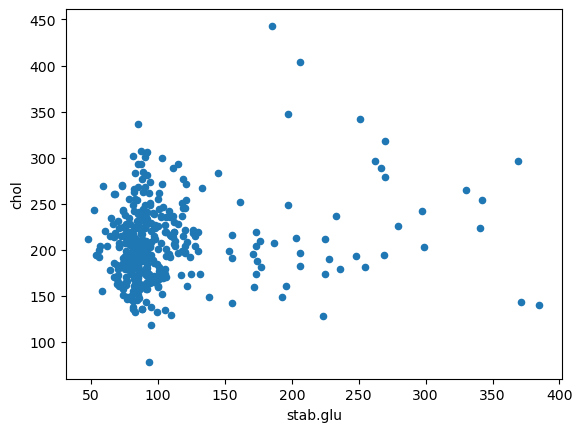

In [34]:
df.plot.scatter(x='stab.glu',y='chol')

<Axes: >

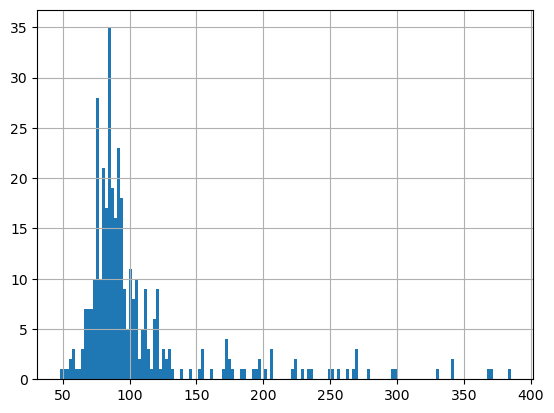

In [55]:
df['stab.glu'].hist(bins=150)

In [36]:
# Split Data
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
# Train Model
# Now we train our LinearRegression model using the training subset of data.

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
# Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, 
# which is an array of tuples of coefficients.
# Each regression coefficient shows the strength of the relationship between the predictor variable and the
# outcome variable while controlling for the other predictor variable 

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

The coefficient for stab.glu is -0.059606363528342796
The coefficient for hdl is 2.3139423426127497
The coefficient for ratio is 27.648128714299673
The coefficient for glyhb is 1.1382567665236747
The coefficient for age is 0.10588021233755147
The coefficient for height is -1.0546153948852708
The coefficient for weight is 0.025988773709301725
The coefficient for bp.1s is 0.0330297087529742
The coefficient for bp.1d is 0.11169695449323098
The coefficient for gender_dummy is 0.8292960809564376
The coefficient for frame_large is -0.6724566160902195
The coefficient for frame_medium is 2.9725008708913006
The coefficient for frame_small is -2.300044254801078


In [42]:
# regression_model.intercept_ returns an array of intercepts
intercept = lm.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10.604682860746806


In [44]:
# R-squared  can be determined using our test set and the model’s score method.

lm.score(X_test, y_test)



0.6594346499852195

In [46]:
# We can get the mean squared error using scikit-learn’s mean_squared_error method 
# and comparing the prediction for the test data set (data not used for training) 
# with the ground truth for the data test set.

# We'll start with calculating the Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

y_predict = lm.predict(X_test)

regression_model_mse = mean_squared_error(y_test, y_predict)

regression_model_mse

635.2897083476225

In [48]:
# And now we can calculate the Root Mean Squared Error (RMSE)
import math

rmse = math.sqrt(regression_model_mse)
print(rmse)

25.20495404375145


In [20]:
# Now, let's try to make a prediction

# 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age',
#       'height', 'weight', 'bp.1s', 'bp.1d', 'gender_dummy',
#       'frame_large', 'frame_medium', 'frame_small'

#new_data = [[92, 137.0, 6.2, 4.64, 58, 61.0, 256.0, 190.0, 92.0, 1, 1, 0, 0]]

new_data = [[92, 60.0, 6.2, 4.64, 25, 61.0, 175.0, 120.0, 65.0, 1, 0, 0, 1]]

lm.predict(new_data)



array([[273.27396794]])